In [1]:
import matplotlib.pyplot as plt
import keras
# from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
# import cifar10 dataset
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
# shuffle and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)
y_test shape: (10000, 1)


(32, 32, 3)


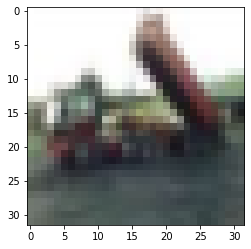

In [4]:
print(x_train[0].shape)
image = x_train[2]
plt.imshow(image)
plt.show()

In [3]:
import numpy as np
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
      dtype=int64))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64))


In [16]:
print(x_test[0,0:2,0:2,])
#print(y_train[1,0])
#print(y_train)

[[[158 112  49]
  [159 111  47]]

 [[152 112  51]
  [151 110  40]]]


In [4]:
# define number of classes
num_classes = 10
# Convert class vectors to binary class matrices.
y_train2 = keras.utils.to_categorical(y_train, num_classes)
y_test2 = keras.utils.to_categorical(y_test, num_classes)
print(y_train2.shape)
print(y_test2.shape)

(50000, 10)
(10000, 10)


In [5]:
# convert input train and test as float and devide it by 255 to have values between 0 and 1
# each pixel can have values from 1 to 255 based on the colour and intensity
x_train2 = x_train.astype('float32')
x_test2 = x_test.astype('float32')
x_train2 /= 255
x_test2 /= 255
print(x_train2.shape)

(50000, 32, 32, 3)


In [6]:
input_dim = x_train2.shape[1:]
print(input_dim)
print(type(input_dim))

(32, 32, 3)
<class 'tuple'>


In [7]:
# Initialize the model
model = Sequential()

# Create the model with two 32 convolution filters -> pooling layer -> two 64 conv filters -> pooling layer 
#                                                  -> flattening -> fully conncted layer 

# add first convolution layer with 32 filters of 3 x 3 size
# image shape will be 32 x 32 x 10 as 10 filters are used with 'same' padding
model.add(Conv2D(10, (3, 3), padding='same',input_shape=input_dim))
model.add(Activation('relu'))

# add second convolution layer with 32 filters of 3 x 3 size
# image shape will be 30 x 30 x 5 as 5 filters are used without padding
#model.add(Conv2D(5, (3, 3)))
#model.add(Activation('relu'))

# add pooling layer with 2 x 2 pooling - default stride is same as pooling size
# image shape will be 15 x 15 x 5 as pooling size and stride are 2
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))                       # drops 25% of units randomly for each epoch

# add thrid convolution layer with 15 filters of 3 x 3 size
# image shape will be 15 x 15 x 5 as 15 filters are used with 'same' padding
#model.add(Conv2D(5, (3, 3), padding='same'))
#model.add(Activation('relu'))

# add fourth convolution layer with 64 filters of 3 x 3 size
# image shape will be 14 x 14 x 5 as 5 filters are used without padding
#model.add(Conv2D(5, (2, 2)))
#model.add(Activation('relu'))

# add pooling layer with 2 x 2 pooling
# image shape will be 7 x 7 x 5 as pooling size and stride are 2
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))                       # drops 25% of units randomly for each epoch

# add flattening layer to flattens into single dimensional
# number of features will be = 7 x 7 x 5
model.add(Flatten())                           

# add hidden layer with 50 units with RELU as activation and dropout rate of 50%
model.add(Dense(10))                          
model.add(Activation('relu'))
#model.add(Dropout(0.5))

# add output layers with number of classes in target variable with softmax as activation
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [8]:
# compile the model
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [9]:
# define the batch size and epochs
batch_size = 100
epochs = 2
# run the model with given data
model.fit(x_train2, y_train2,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test2, y_test2),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 18s 356us/step - loss: 2.2498 - accuracy: 0.1248 - val_loss: 2.2106 - val_accuracy: 0.1688
Epoch 2/2
50000/50000 [==============================] - 17s 346us/step - loss: 2.1749 - accuracy: 0.1779 - val_loss: 2.1479 - val_accuracy: 0.2118


In [10]:
model.summary()
# the input image size is 32 x 32 x 3
# for first layer, 32 filters of 3x3 size applied across depth(3) of input image. 
# Hence, number of parameters will be 32 x 3 x 3 x 3 + 32 (Number of intercepts/filters) = 896
# output size remains 32 x 32 as padding is done. the depth of impage is now 32 due to 32 number of filters
# for second layer, 32 filters of 3x3 size applied across depth(32) of input image. 
# Hence, number of parameters will be 32 x 3 x 3 x 32 + 32 (Number of intercepts/filters) = 9248
# output size changed to 30 x 30 as padding is not done. the depth of impage is now 32 due to 32 number of filters
# after pooling done with 2 x 2 size with striding with same size, the image size got reduced to 15 x 15
# for third layer with 64 filters: 64 x 3 x 3 x 32 + 64 = 18496. 
# output size remains 15 x 15 as padding is done. the depth of impage is now 64 due to 64 number of filters
# for fourth layer with 64 filters: 64 x 3 x 3 x 64 + 64 = 36928. 
# output size remains 13 x 13 as padding is not done. the depth of impage is now 64 due to 64 number of filters
# after pooling done with 2 x 2 size with striding with same size, the image size got reduced to 6 x 6
# after flattening, the number of input nodes = 6 x 6 x 64 = 2304
# as the number of nodes in hidden layer is 512, 
# the no. of parameters between input and hidder layer: 2304 x 512 + 512 = 1180160 (including 512 intercepts)
# as the number of nodes in output layer is 10, 
# the no. of parameters between hidder and output layer: 512 x 10 + 10 = 530 (including 10 intercepts)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 10)        280       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 10)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2560)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                25610     
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [48]:
# get weights for any layer
model.layers[0].get_weights()[0]

array([[[[-0.09719947,  0.12310453,  0.00298954, -0.10722345, -0.00596494,
          -0.09856968,  0.06461298,  0.1221973 ,  0.08826432, -0.02039197,
           0.11277551, -0.12446858, -0.12601262, -0.01444677,  0.1400363 ,
           0.09806473, -0.07937647,  0.02906777,  0.0787327 , -0.00046995,
          -0.08936881,  0.14222652,  0.07164593,  0.10154688, -0.13192289,
           0.07783452,  0.08297219,  0.08491747,  0.02095241, -0.00857404,
          -0.12191526,  0.03462327],
         [-0.00389243, -0.03419906,  0.07482473,  0.1406309 ,  0.01020346,
           0.06998823, -0.06564525, -0.0042068 , -0.11174366,  0.04762294,
          -0.11359771, -0.12697028, -0.11740825, -0.13842449, -0.0133414 ,
           0.13542661, -0.01256989, -0.0554494 , -0.1035741 , -0.04378662,
           0.11785579,  0.09435111, -0.06218493, -0.01594055,  0.13553922,
          -0.03583952,  0.05977153, -0.00325366,  0.0565953 ,  0.03908509,
          -0.04924184, -0.05740385],
         [-0.09197115,  0.

In [45]:
# get output of any layer
model.layers[0].output[0]

<tf.Tensor 'strided_slice:0' shape=(32, 32, 32) dtype=float32>

In [13]:
# predict on test
y_pred = model.predict(x_test2)
print(y_pred.shape)
print(y_pred[0:5,])

(10000, 10)
[[0.20791098 0.16587313 0.07654593 0.1494975  0.0453967  0.07653155
  0.07894804 0.10185798 0.07185997 0.02557811]
 [0.06723771 0.20658918 0.03580806 0.02194618 0.01833847 0.00991812
  0.01394072 0.01742824 0.35791096 0.25088236]
 [0.10172568 0.14669454 0.03055593 0.02654443 0.02249378 0.01707674
  0.01919279 0.02885925 0.4262     0.18065685]
 [0.32484365 0.14879444 0.04847208 0.08345231 0.03562198 0.02565824
  0.02499546 0.06612279 0.2075023  0.0345368 ]
 [0.16296154 0.08615512 0.08740304 0.11959009 0.08420058 0.12367
  0.14203303 0.12491816 0.03352776 0.03554069]]


In [14]:
# convert the Y_pred into single dimension
y_pred2 = np.argmax(y_pred, axis=1)
print(y_pred2.shape)
print(y_pred2[0:5])

(10000,)
[0 8 8 0 0]


In [15]:
# Evaluating using confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
print (confusion_matrix(y_test,y_pred2))
print (classification_report(y_test,y_pred2))

[[537  75   0   0   0   7  31  38 243  69]
 [194 416   0   0   0  33  56  29 106 166]
 [528  71   2   0   0  70 154  90  50  35]
 [400  84   4   0   0 158 150 105  25  74]
 [477  54   2   0   0  52 223 130  25  37]
 [387  72   4   0   0 236 142 105  22  32]
 [318  94   3   1   0 124 314  84  10  52]
 [350  78   1   1   0  59  97 234  27 153]
 [300 119   0   0   0  17  15   9 434 106]
 [182 156   2   0   0  22  43  36 125 434]]
              precision    recall  f1-score   support

           0       0.15      0.54      0.23      1000
           1       0.34      0.42      0.37      1000
           2       0.11      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.30      0.24      0.27      1000
           6       0.26      0.31      0.28      1000
           7       0.27      0.23      0.25      1000
           8       0.41      0.43      0.42      1000
           9       0.37     

C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
